In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Features: Hours Studied
# Labels: Passed (1) or Failed (0)

# Feature matrix is (num_examples, num_features), here num_features=1.
X = np.array([
    [1.3],
    [2.1],
    [2.2],
    [3.0],
    [3.5],
    [5.0],
])

# Labels vector is (num_examples,), here binary classification.
y = np.array([0, 1, 0, 1, 1, 1])

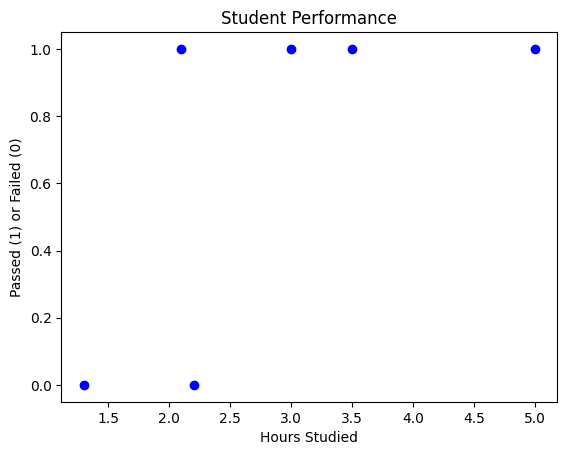

In [5]:
plt.figure()
plt.scatter(X, y, color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Passed (1) or Failed (0)')
plt.title('Student Performance')
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
# Predicting pass/fail.

# New student who studied 4 hours.
x_new_student = np.array([[4.0]])

y_pred = model.predict(x_new_student)

print(f"Predicted class for a student who studied 4 hours: {y_pred[0]}")

Predicted class for a student who studied 4 hours: 1


In [19]:
y_pred_treino = model.predict(X)
proba_treino = model.predict_proba(X)

In [20]:
y_pred_treino

array([0, 1, 1, 1, 1, 1])

In [18]:
proba_treino

array([[0.62406576, 0.37593424],
       [0.446496  , 0.553504  ],
       [0.42432379, 0.57567621],
       [0.26371882, 0.73628118],
       [0.18576318, 0.81423682],
       [0.05567555, 0.94432445]])

In [21]:
import pandas as pd

df = pd.DataFrame(proba_treino, columns=['Proba. Failed', 'Proba. Passed'])
df['Predicted'] = y_pred_treino
df['Hours Studied'] = X.flatten()
df['Actual'] = y

df

,Proba. Failed,Proba. Passed,Predicted,Hours Studied,Actual
0,0.624066,0.375934,0,1.3,0
1,0.446496,0.553504,1,2.1,1
2,0.424324,0.575676,1,2.2,0
3,0.263719,0.736281,1,3.0,1
4,0.185763,0.814237,1,3.5,1
5,0.055676,0.944324,1,5.0,1


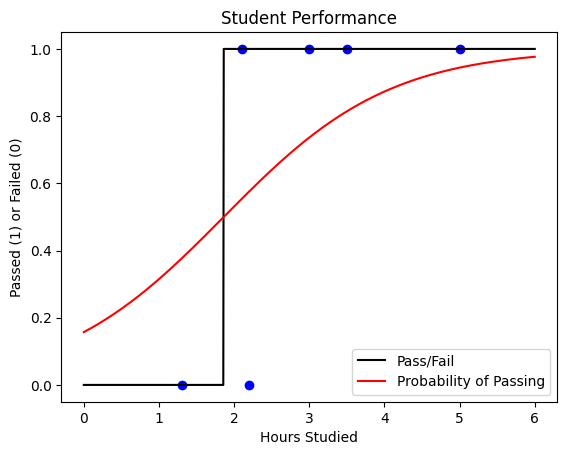

In [24]:
x_aux = np.linspace(0, 6, 1000).reshape(-1, 1)
y_aux = model.predict(x_aux)

proba_aux = model.predict_proba(x_aux)
proba_aux = proba_aux[:, 1]  # Second column is probability of class 1 (Passed).

plt.figure()
plt.scatter(X, y, color='blue')
plt.plot(x_aux, y_aux, color='black', label='Pass/Fail')
plt.plot(x_aux, proba_aux, color='red', label='Probability of Passing')
plt.xlabel('Hours Studied')
plt.ylabel('Passed (1) or Failed (0)')
plt.title('Student Performance')
plt.legend()
plt.show()